### Import libraries

In [1]:
import obspy as obs
import numpy as np
import matplotlib.pyplot as plt

from andbro__querrySeismoData import __querrySeismoData
from andbro__get_timeaxis import __get_timeaxis

In [2]:
def __get_stream(config):
    st = obs.Stream()

    for i in range(len(config.get("sta"))):

        seed = f'{config.get("net")[i]}.{config.get("sta")[i]}.{config.get("loc")}.{config.get("cha")}'

        print(f"loading {seed}...")
        try:
            st0, inv = __querrySeismoData(  
                                        seed_id=seed,
                                        starttime=config.get("tbeg"),
                                        endtime=config.get("tend"),
                                        where=config.get("repository"),
                                        path=None,
                                        restitute=True,
                                        detail=None,
                                        fill_value=None,
                                        )
            if len(st0) != 0:
                st += st0
        except: 
            print("Failed!")
    return st

### Configurations

In [3]:
config = {}

config['tbeg'] = obs.UTCDateTime("2021-09-27 06:17")
config['tend'] = obs.UTCDateTime("2021-09-27 06:45")

config['sta'] = ['GELB','GRMB','BIB','TON', 'ALFT', 'FFB1', 'FFB2', 'FFB3', 'FUR']
config['net'] = ['BW','BW','BW','BW','BW','BW','BW','BW','GR']
config['loc'] = ''
config['cha'] = 'BHZ'

config['repository'] = "jane"

## 
# config['event'] = {'t0':'2021-09-27 06:17', 'lat':35.252 , 'lon':25.259}

## Crete, Greece
config['event'] = {'t0':'2021-10-12 09:24', 'lat':35.193 , 'lon':26.256}

In [4]:
st = __get_stream(config)

loading BW.GELB..BHZ...
loading BW.GRMB..BHZ...
loading BW.BIB..BHZ...


/home/brotzer/anaconda3/lib/python3.7/site-packages/obspy/core/inventory/network.py:324: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)
/home/brotzer/anaconda3/lib/python3.7/site-packages/obspy/core/inventory/network.py:254: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)


loading BW.TON..BHZ...
loading BW.ALFT..BHZ...
loading BW.FFB1..BHZ...
loading BW.FFB2..BHZ...
loading BW.FFB3..BHZ...
loading GR.FUR..BHZ...


### Remove traces with no coordinates

In [5]:
for i, tr in enumerate(st): 
    try: 
        tr.stats.coordinates;
    except:
        print(f'removing {tr.stats.station}')
        st.remove(tr);
        
print(st);

9 Trace(s) in Stream:
BW.GELB..BHZ | 2021-09-27T06:16:59.997500Z - 2021-09-27T06:44:59.997500Z | 20.0 Hz, 33601 samples
BW.GRMB..BHZ | 2021-09-27T06:17:00.012500Z - 2021-09-27T06:45:00.012500Z | 20.0 Hz, 33601 samples
BW.BIB..BHZ  | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.TON..BHZ  | 2021-09-27T06:16:59.997500Z - 2021-09-27T06:44:59.997500Z | 20.0 Hz, 33601 samples
BW.ALFT..BHZ | 2021-09-27T06:17:00.017500Z - 2021-09-27T06:45:00.017500Z | 20.0 Hz, 33601 samples
BW.FFB1..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.FFB2..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.FFB3..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
GR.FUR..BHZ  | 2021-09-27T06:16:59.990000Z - 2021-09-27T06:44:59.990000Z | 20.0 Hz, 33601 samples


### Add distance to event

In [6]:
from obspy.geodetics import gps2dist_azimuth     

for tr in st:
    tr.stats.distance = gps2dist_azimuth(tr.stats.coordinates.latitude, 
                                         tr.stats.coordinates.longitude,
                                         config.get("event").get("lat"),
                                         config.get("event").get("lon"),
                                        )[0]
st

9 Trace(s) in Stream:
BW.GELB..BHZ | 2021-09-27T06:16:59.997500Z - 2021-09-27T06:44:59.997500Z | 20.0 Hz, 33601 samples
BW.GRMB..BHZ | 2021-09-27T06:17:00.012500Z - 2021-09-27T06:45:00.012500Z | 20.0 Hz, 33601 samples
BW.BIB..BHZ  | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.TON..BHZ  | 2021-09-27T06:16:59.997500Z - 2021-09-27T06:44:59.997500Z | 20.0 Hz, 33601 samples
BW.ALFT..BHZ | 2021-09-27T06:17:00.017500Z - 2021-09-27T06:45:00.017500Z | 20.0 Hz, 33601 samples
BW.FFB1..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.FFB2..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.FFB3..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
GR.FUR..BHZ  | 2021-09-27T06:16:59.990000Z - 2021-09-27T06:44:59.990000Z | 20.0 Hz, 33601 samples

### Plotting

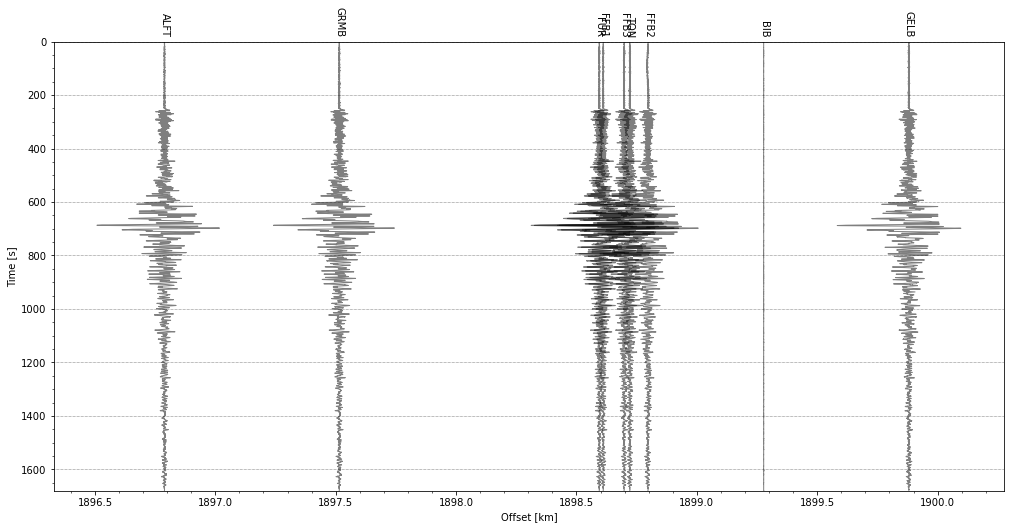

In [7]:
fig = plt.figure(figsize=(15,8))
st.plot(type="section", 
#         dist_degree=True, 
#         ev_coord=(config.get("event").get("lat"),config.get("event").get("lon")),
        norm_method='stream',
        time_down=True,
        show=False,
        fig=fig,
        );

from matplotlib.transforms import blended_transform_factory

ax = fig.axes[0]
transform = blended_transform_factory(ax.transData, ax.transAxes)
for tr in st:
    ax.text(tr.stats.distance / 1e3, 1.01, tr.stats.station, rotation=270,
            va="bottom", ha="center", transform=transform, zorder=10)
plt.show();

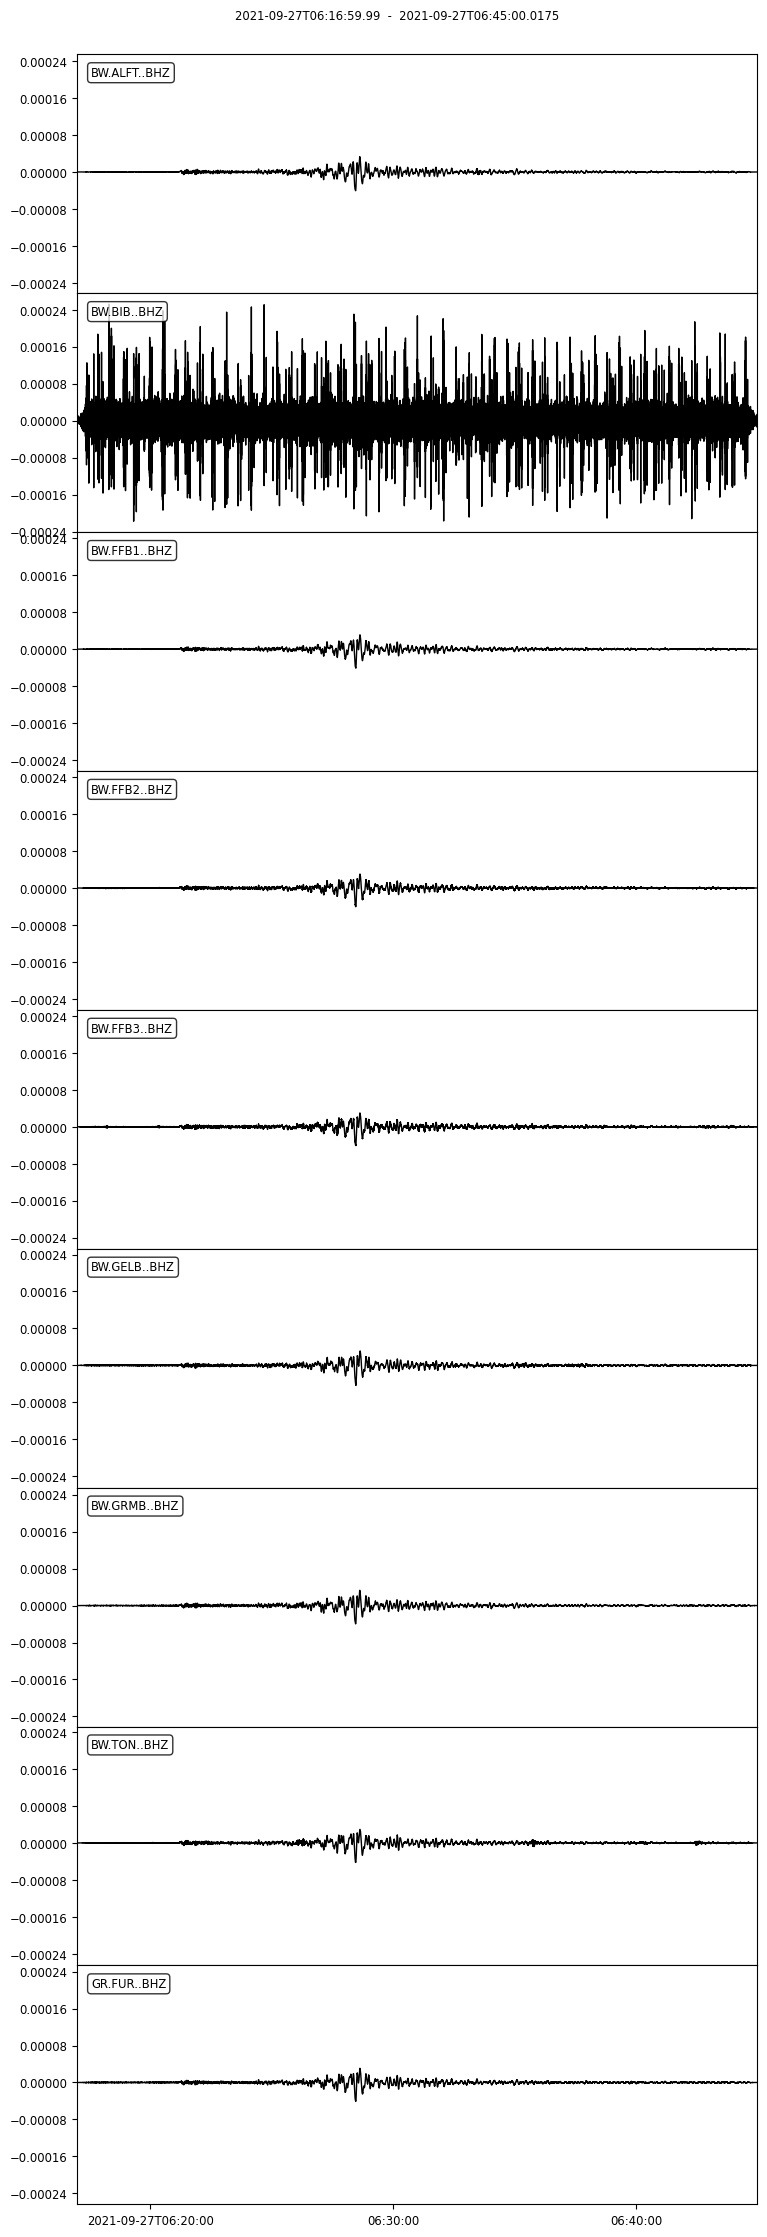

In [8]:
st.plot();

In [ ]:
st.merge()